# EXP20：巨磁阻效应与应用

> [@Maxwell Jay](https://github.com/MaxwellJay256), 2024.5.18

## 程序说明

实验要绘制 5 幅图：
1. GMR 模拟传感器的磁电转换特性曲线
2. GMR 磁阻特性曲线
3. GMR 开关传感器的磁电转换特性曲线
4. GMR 模拟传感器测量电流
5. GMR 梯度传感器的特性曲线
   
分别按照以下 5 段代码的要求修改 csv 文件，然后运行代码即可。

## 1 GMR 模拟传感器的磁电转换特性曲线

按照实验原始数据记录的格式修改 [`data-1.csv`](./data-1.csv)，可以在 Excel 中编辑。

磁感应强度已经算好了。

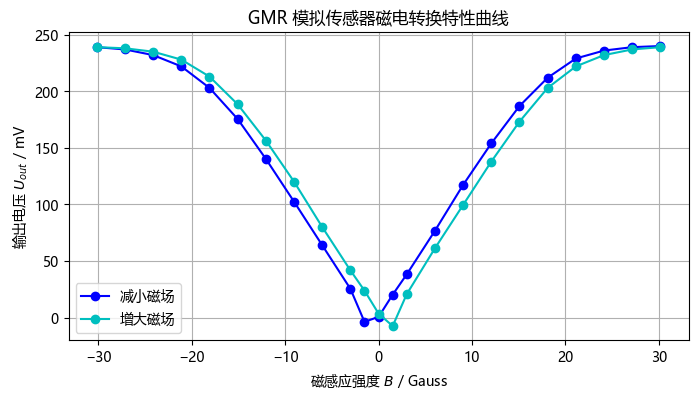

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# 读取 csv 文件
def read_csv(filename:str) -> list:
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
    return data

data = read_csv('data-1.csv')
data = np.array(data[2:]) # 去掉前 2 行的标题
B = data[:, 1].astype(float) # 第 2 列为磁感应强度 B / Gauss
U_decrease = data[:, 2].astype(float) # 第 3 列为减磁时的电压 U_out / mV
U_increase = data[:, 3].astype(float) # 第 4 列为增磁时的电压 U_out / mV
# 画图
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure(figsize=(8, 4))
plt.plot(B, U_decrease, 'bo-', label='减小磁场')
plt.plot(B, U_increase, 'co-', label='增大磁场')
plt.xlabel('磁感应强度 $B$ / Gauss')
plt.ylabel('输出电压 $U_{out}$ / mV')
plt.title('GMR 模拟传感器磁电转换特性曲线')
plt.legend()
plt.grid()
plt.savefig('1-GMR模拟传感器磁电转换特性曲线.png')
plt.show()



## 2 GMR 磁阻特性曲线

按照实验原始数据记录的格式修改 [`data-2.csv`](./data-2.csv)，可以在 Excel 中编辑。

磁感应强度已经算好了。

根据磁阻电流计算磁阻，用 Excel 的公式就可以了，所以这里没有给出计算过程，只有绘图。

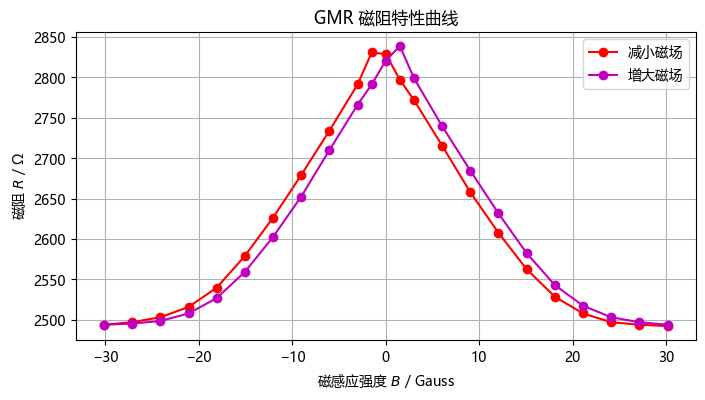

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# 读取 csv 文件
def read_csv(filename:str) -> list:
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
    return data

data = read_csv('data-2.csv')
data = np.array(data[1:]) # 去掉第 1 行的标题
B = data[:, 1].astype(float) # 第 2 列为磁感应强度 B / Gauss
R_decrease = data[:, 3].astype(float) # 第 4 列为减磁时的磁阻 R / Ω
R_increase = data[:, 5].astype(float) # 第 6 列为增磁时的磁阻 R / Ω

# 画图
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure(figsize=(8, 4))
plt.plot(B, R_decrease, 'ro-', label='减小磁场')
plt.plot(B, R_increase, 'mo-', label='增大磁场')
plt.xlabel('磁感应强度 $B$ / Gauss')    
plt.ylabel('磁阻 $R$ / Ω')
plt.title('GMR 磁阻特性曲线')
plt.legend()
plt.grid()
plt.savefig('2-GMR磁阻特性曲线.png')
plt.show()


## 3 GMR 开关传感器的磁电转换特性曲线

第 3 幅图的数据不多，所以没有单独的 csv 文件，直接在代码中定义了。

修改下方程序中的 `V_H` `V_L` `B` 即可。

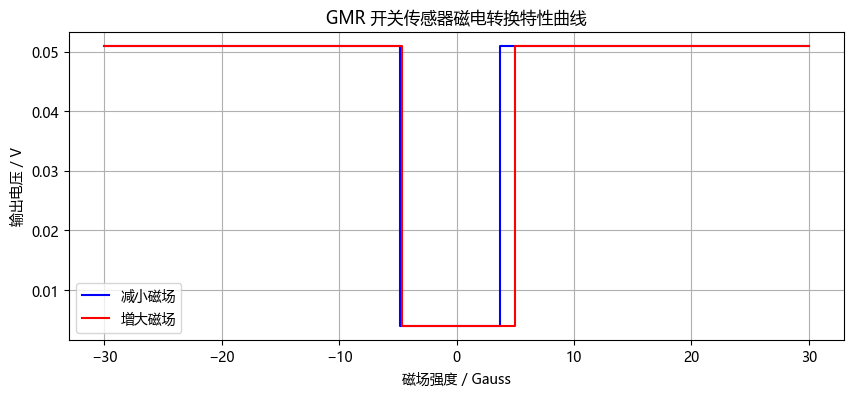

In [5]:
import matplotlib.pyplot as plt

V_H = 0.051 # 高电平 / V
V_L = 0.004 # 低电平 / V
B = [[-4.825, 3.710], # 减磁时的阈值磁感应强度（先小后大） B / Gauss
     [-4.645, 4.976]] # 增磁时的阈值磁感应强度（先小后大） B / Gauss

# 画图
for i in range(2):
    B[i] = [x for x in B[i] for _ in range(2)]  # 重复每个阈值磁感应强度两次
    B[i].insert(0, -30)  # 在列表开头添加一个 -30
    B[i].append(30)  # 在列表末尾添加一个 30
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure(figsize=(10, 4))
plt.plot(B[0], [V_H, V_H, V_L, V_L, V_H, V_H], 'b-', label='减小磁场')
plt.plot(B[1], [V_H, V_H, V_L, V_L, V_H, V_H], 'r-', label='增大磁场')
plt.xlabel('磁场强度 / Gauss')    
plt.ylabel('输出电压 / V')
plt.title('GMR 开关传感器磁电转换特性曲线')
plt.legend()
plt.grid()
plt.savefig('3-GMR开关传感器磁电转换特性曲线.png')
plt.show()

## 4 GMR 模拟传感器测量电流

按照实验原始数据记录的格式修改 [`data-4.csv`](./data-4.csv)，可以在 Excel 中编辑。

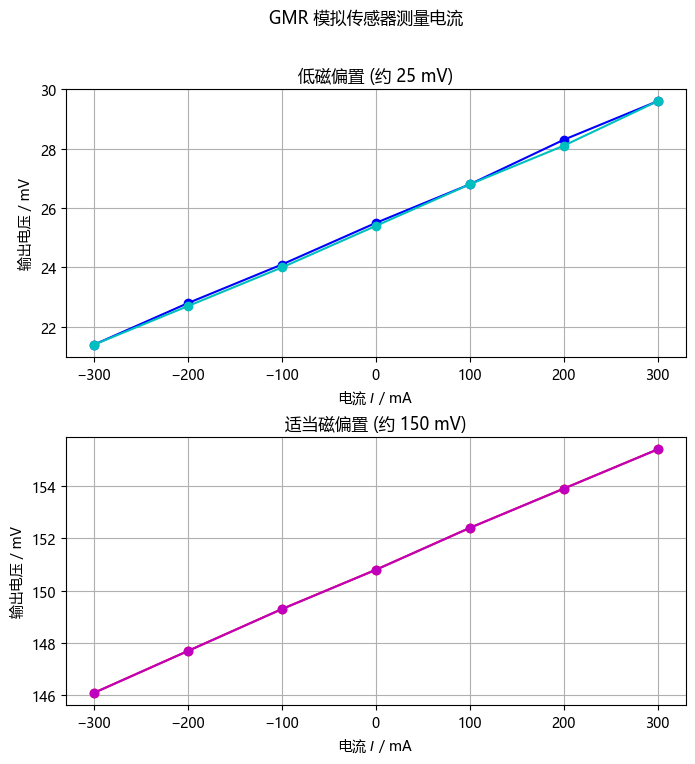

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# 读取 csv 文件
def read_csv(filename:str) -> list:
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
    return data

data = read_csv('data-4.csv')
I = np.array(data[0]).astype(float) # 第 1 行为电流 I / mA
U = []
for i in range(1, 5):
    U.append(np.array(data[i]).astype(float)) # 第 2-5 行为输出电压 U_out / mV

# 画图
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure(figsize=(8, 8))
plt.suptitle('GMR 模拟传感器测量电流')

# 分为上下两个子图
plt.subplot(2, 1, 1)
plt.title('低磁偏置 (约 25 mV)')
plt.plot(I, U[0], 'bo-', label='减小电流')
plt.plot(I, U[1], 'co-', label='增大电流')
plt.xlabel('电流 $I$ / mA')
plt.ylabel('输出电压 / mV')
plt.grid()

plt.subplots_adjust(hspace=0.3) # 调整子图之间的间距

plt.subplot(2, 1, 2)
plt.title('适当磁偏置 (约 150 mV)')
plt.plot(I, U[2], 'ro-', label='减小电流')
plt.plot(I, U[3], 'mo-', label='增大电流')
plt.xlabel('电流 $I$ / mA')
plt.ylabel('输出电压 / mV')
plt.grid()
plt.savefig('4-GMR模拟传感器测量电流.png')
plt.show()


## 5 GMR 梯度传感器的特性曲线

直接修改下方程序中的 `U_out` 为你的测量数据即可。

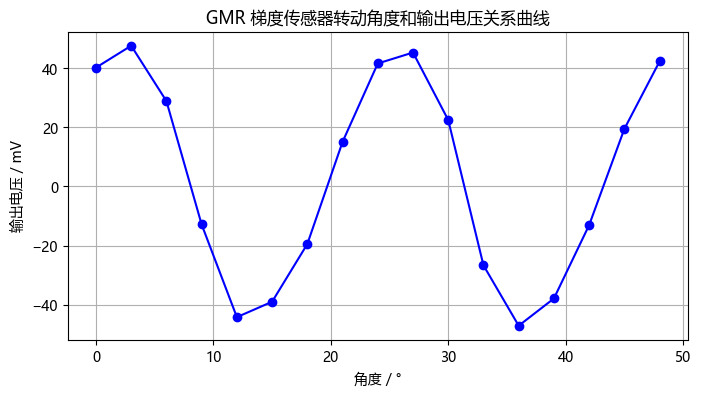

In [7]:
import matplotlib.pyplot as plt

# 5. GMR 梯度传感器的特性
angle = range(0, 51, 3) # 角度，0° ~ 48°，步长 3
U_out = [40.1, 47.5, 28.8, -12.9, -44.2, -39.0, -19.5, 15.0, 41.5, 45.2, 22.4, -26.7, -47.1, -37.9, -13.1, 19.4, 42.2]

# 画图
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure(figsize=(8, 4))
plt.plot(angle, U_out, 'bo-')
plt.xlabel('角度 / °')
plt.ylabel('输出电压 / mV')
plt.title('GMR 梯度传感器转动角度和输出电压关系曲线')
plt.grid()
plt.savefig('5-GMR梯度传感器转动角度和输出电压关系曲线.png')
plt.show()
